In [78]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:


# Data manipulation libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns 

In [3]:
# Setting visualization styles and options

import matplotlib.pyplot as plt


sns.set_style('whitegrid')  # Setting seaborn style
plt.style.use('seaborn-v0_8-whitegrid') 

# Set Matplotlib style
plt.style.use('Solarize_Light2')  # Compatible with most versions

# Set default figure size for Matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)



In [4]:
# Display all columns and rows
pd.set_option('display.max_columns', None)


In [5]:

# Data manipulation libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# For interactive plots in the notebook
import plotly.io as pio
pio.templates.default = "plotly_white"  # Setting plotly template

In [9]:
# In[2]:


# Load the training and test datasets
# pd.read_csv() is used to read CSV files into pandas DataFrames
train_df = pd.read_csv('train.csv')  # Loading training data
test_df = pd.read_csv(r"C:\Users\Shloka\Downloads\titanic\test.csv")    # Loading test data

# Display the first few rows of the training data to get a quick overview
print("Training dataset shape:", train_df.shape)  # Displays the number of rows and columns
train_df.head()  # Shows the first 5 rows of the dataframe

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# ## 3. Initial Data Exploration
# 
# Let's get a better understanding of our data by exploring its structure and contents:

# In[3]:


# Get information about the dataset including data types and non-null values
# This helps identify missing values and understand data types
print("Training dataset information:")
train_df.info()


Training dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# In[4]:


# Get statistical summary of the numerical features
# This provides metrics like mean, std, min, max, quartiles for numerical columns
print("Statistical summary of numerical features:")
train_df.describe()

Statistical summary of numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# In[5]:


# Get statistical summary of the categorical features
# This shows count, unique values, top value, and its frequency for categorical columns
print("Statistical summary of categorical features:")
train_df.describe(include=['O'])  # 'O' stands for Object data type (typically strings)

Statistical summary of categorical features:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
# In[6]:


# Check for missing values in the training dataset
# This calculates the number and percentage of missing values for each column
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)

In [ ]:
# Create a dataframe to show missing value information
missing_data = pd.concat([missing_train, missing_percent], axis=1, keys=['Total', 'Percent'])
print("Missing values in training dataset:")
missing_data[missing_data['Total'] > 0]  # Show only columns with missing values


Missing values in training dataset:


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245


In [ ]:
# ## 4. Missing Value Analysis and Visualization
# 
# Let's visualize the missing values to better understand their distribution:

# In[7]:

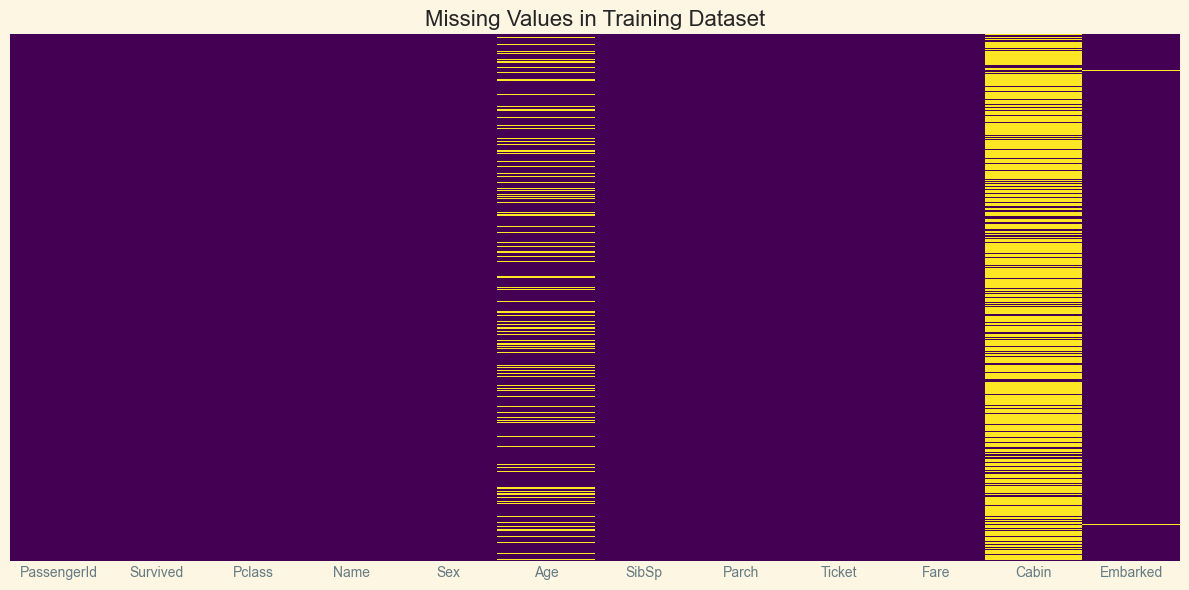

In [ ]:
# Visualize missing values using a heatmap
# This creates a visual representation of where missing values are in the dataset
plt.figure(figsize=(12, 6))

# sns.heatmap creates a heatmap, where each cell is colored based on its value
# Here, we're coloring cells where values are missing
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values in Training Dataset', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Explanation: 
# - Yellow areas indicate missing values
# - Purple areas indicate present values
# - This visualization helps us see patterns in missing data

In [ ]:

# ## 5. Data Cleaning and Preprocessing
# 
# Now let's start cleaning the data and handling missing values:

# In[8]:


# Create a copy of the datasets to avoid modifying originals
train = train_df.copy()
test = test_df.copy()

In [ ]:
# Combine train and test for preprocessing (helps ensure consistent transformations)
# We'll separate them again before training a model
full_data = pd.concat([train, test], ignore_index=True)
print(f"Combined dataset shape: {full_data.shape}")

Combined dataset shape: (1309, 12)


In [ ]:
# Check the new combined dataset
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


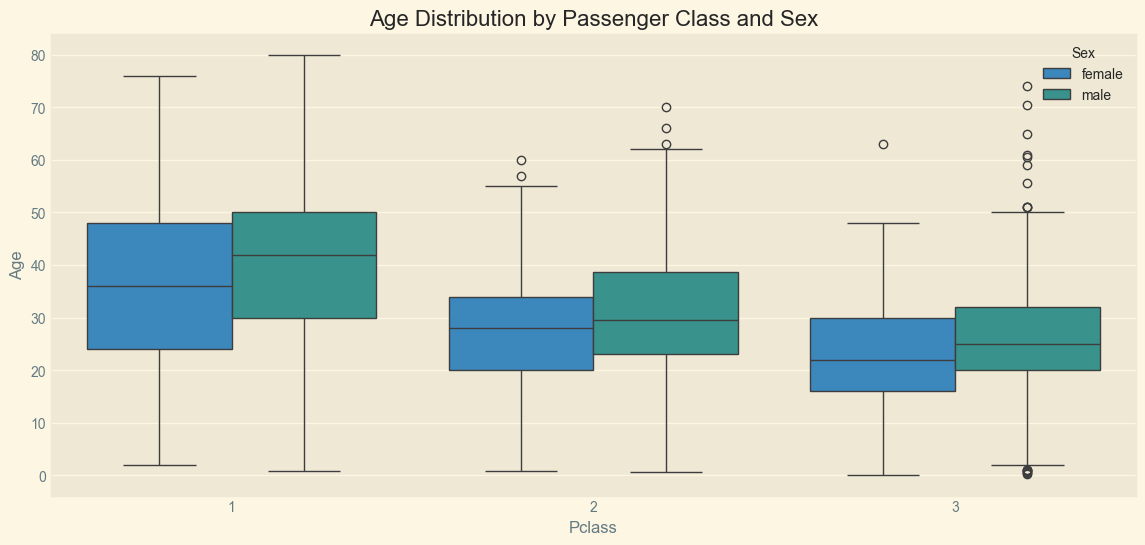

In [ ]:

# ### 5.1 Handling Missing Values

# In[9]:


# Let's handle missing values for each feature with missing data

# 1. Age: Missing in both train and test
# Let's impute age using median age by passenger class and sex
# This is more precise than using the overall median

# First, let's explore the relationship between Age, Pclass, and Sex
plt.figure(figsize=(14, 6))

# Create a boxplot showing Age distribution by Pclass and Sex
# This helps visualize if these features relate to Age
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=full_data)
plt.title('Age Distribution by Passenger Class and Sex', fontsize=16)
plt.show()


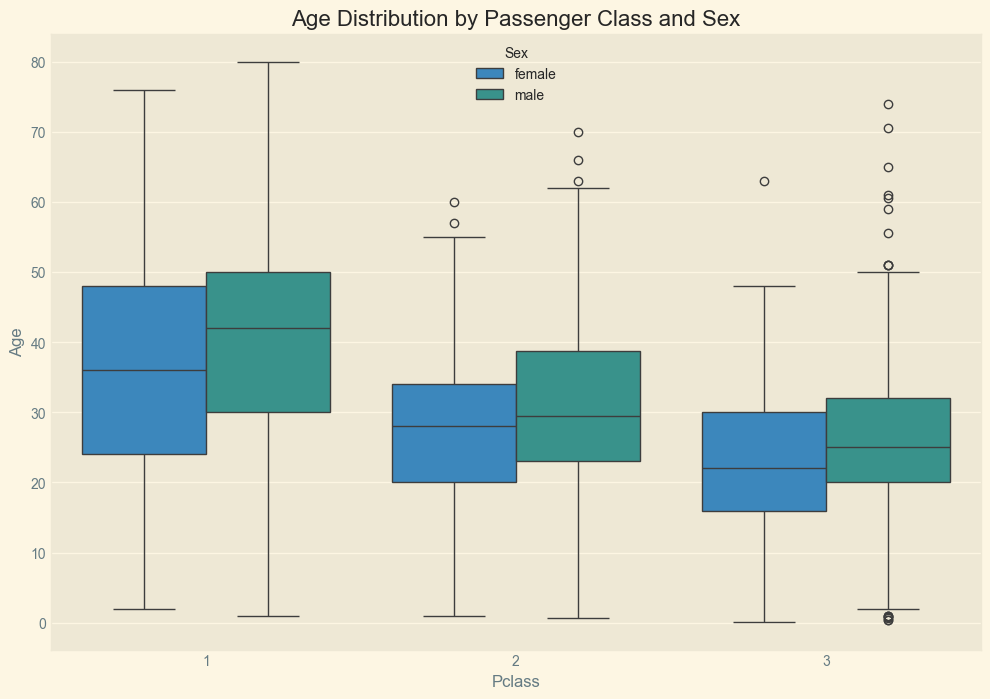

In [ ]:
# Create a boxplot showing Age distribution by Pclass and Sex
# This helps visualize if these features relate to Age
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=full_data)
plt.title('Age Distribution by Passenger Class and Sex', fontsize=16)
plt.show()

In [ ]:
# Based on the boxplot, we'll use Pclass and Sex to impute Age


# In[10]:


# Create a function to impute missing ages based on passenger class and sex
def impute_age(data):
    # Group by Sex and Pclass and calculate median age for each group
    age_median = data.groupby(['Sex', 'Pclass'])['Age'].transform('median')
    
    # Fill missing age values with the calculated medians
    data['Age'] = data['Age'].fillna(age_median)
    
    return data

In [ ]:
# Apply the function to our dataset
full_data = impute_age(full_data)

In [ ]:
# Verify the imputation worked
print("Missing values in Age after imputation:", full_data['Age'].isnull().sum())

Missing values in Age after imputation: 0


In [ ]:
# In[11]:


# 2. Embarked: Missing in train only (2 values)
# Since this is a categorical variable with very few missing values,
# we'll fill with the most common value (mode)

# Find the most common embarked value
most_common_embarked = full_data['Embarked'].mode()[0]
print(f"Most common embarked port: {most_common_embarked}")

Most common embarked port: S


In [ ]:
# Fill missing Embarked values
full_data['Embarked'] = full_data['Embarked'].fillna(most_common_embarked)

In [ ]:
# Verify the imputation worked
print("Missing values in Embarked after imputation:", full_data['Embarked'].isnull().sum())

Missing values in Embarked after imputation: 0


In [ ]:

# In[12]:


# 3. Fare: Missing in test only (1 value)
# Let's impute using the median fare for the passenger's class

In [ ]:

# First, identify the missing fare row
missing_fare_row = full_data[full_data['Fare'].isnull()]
print("Missing fare for passenger:", missing_fare_row[['PassengerId', 'Pclass', 'Sex', 'Age']])

Missing fare for passenger:       PassengerId  Pclass   Sex   Age
1043         1044       3  male  60.5


In [ ]:
# Calculate median fare for the missing passenger's class
median_fare = full_data[full_data['Pclass'] == missing_fare_row['Pclass'].values[0]]['Fare'].median()
print(f"Median fare for Pclass {missing_fare_row['Pclass'].values[0]}: {median_fare}")

Median fare for Pclass 3: 8.05


In [ ]:
# Fill the missing fare
full_data['Fare'] = full_data['Fare'].fillna(median_fare)

In [ ]:
# Verify the imputation worked
print("Missing values in Fare after imputation:", full_data['Fare'].isnull().sum())

Missing values in Fare after imputation: 0


In [ ]:

# In[13]:


# 4. Cabin: Missing in both train and test (high percentage)
# Since most values are missing, we'll create a new feature indicating
# whether Cabin is missing or not, as this might relate to survival

# Create a feature for whether Cabin is known
full_data['HasCabin'] = full_data['Cabin'].notna().astype(int)

In [ ]:
# Verify the new feature
print("Cabin known vs unknown:")
print(full_data['HasCabin'].value_counts())

Cabin known vs unknown:
HasCabin
0    1014
1     295
Name: count, dtype: int64


In [ ]:
# In[14]:


# Check remaining missing values
missing = full_data.isnull().sum().sort_values(ascending=False)
print("Remaining missing values:")
missing[missing > 0]

Remaining missing values:


Cabin       1014
Survived     418
dtype: int64

In [ ]:
# ### 5.2 Feature Engineering
# 
# Let's create some new features that might help in predicting survival:

# In[15]:


# 1. Extract titles from passenger names
# Titles might indicate social status and relate to survival

In [ ]:
# Use string operations to extract the title from the Name column
# Regular expression: extract what's between a comma and a dot
full_data['Title'] = full_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
# View the distribution of titles
print("Title distribution:")
full_data['Title'].value_counts()


Title distribution:


Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [ ]:
# In[16]:

In [ ]:
# Group rare titles into broader categories for better analysis
# Map the titles to more general categories

# Create a mapping of titles to categories
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty',
    'Dona': 'Royalty',
    'Capt': 'Officer',
    'Ms': 'Miss'
}

In [ ]:
# Apply the mapping to the Title column
full_data['Title'] = full_data['Title'].map(title_mapping)

In [ ]:
# Fill any potential missing titles with 'Other'
full_data['Title'] = full_data['Title'].fillna('Other')

In [ ]:
# Check the new title distribution
print("Grouped title distribution:")
full_data['Title'].value_counts()

Grouped title distribution:


Title
Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: count, dtype: int64

In [ ]:
# In[17]:


# 2. Create a family size feature
# Family size could impact survival chances

In [ ]:
# Sum the number of siblings/spouses and parents/children
# Add 1 to include the passenger themselves
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch'] + 1

In [ ]:
# Create a feature for whether passenger is alone
full_data['IsAlone'] = (full_data['FamilySize'] == 1).astype(int)

In [ ]:
# Verify the new features
print("Family size distribution:")
full_data['FamilySize'].value_counts().sort_index

Family size distribution:


<bound method Series.sort_index of FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64>

In [ ]:
# In[18]:






In [ ]:
# 3. Create age groups for better visualization and analysis
# Binning continuous variables can sometimes improve model performance
# and makes visualization easier

# Define age group bins and labels
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']



In [ ]:
# In[19]:


# 4. Create fare ranges for better analysis

# Define fare group bins and labels
fare_bins = [0, 7.91, 14.45, 31, 600]
fare_labels = ['Low', 'Mid-Low', 'Mid-High', 'High']

In [ ]:
# Create the fare range feature
full_data['FareRange'] = pd.cut(full_data['Fare'], bins=fare_bins, labels=fare_labels)

In [ ]:

# View the distribution of fare ranges
print("Fare range distribution:")
full_data['FareRange'].value_counts()

Fare range distribution:


FareRange
Mid-High    331
High        330
Low         320
Mid-Low     311
Name: count, dtype: int64

In [ ]:

# In[20]:


# 5. Create a feature for the deck based on cabin letter
# The first letter of the cabin number indicates the deck

In [ ]:
# Extract the deck letter from Cabin
full_data['Deck'] = full_data['Cabin'].str.slice(0, 1)

In [ ]:
# Fill missing values with 'U' for Unknown
full_data['Deck'] = full_data['Deck'].fillna('U')


In [ ]:
# View the distribution of decks
print("Deck distribution:")
full_data['Deck'].value_counts()

Deck distribution:


Deck
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [ ]:

# In[21]:


# Let's create categorical encodings for some features
# This converts categorical variables to numeric for modeling

# One-hot encode Sex, Embarked, and Title
# pd.get_dummies() creates binary columns for each category
categorical_features = ['Sex', 'Embarked', 'Title', 'Deck']
for feature in categorical_features:
    dummies = pd.get_dummies(full_data[feature], prefix=feature, drop_first=True)
    full_data = pd.concat([full_data, dummies], axis=1)

In [ ]:
# Check the newly created dummy variables
print("Full data shape after adding dummy variables:", full_data.shape)
# Let's see some of the dummy variables
print("\nSample of dummy variables:", list(full_data.columns[-15:]))

Full data shape after adding dummy variables: (1309, 34)

Sample of dummy variables: ['Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U']


In [ ]:

# In[22]:


# Let's split back into train and test datasets
train_processed = full_data[:len(train_df)]
test_processed = full_data[len(train_df):]

print(f"Processed training data shape: {train_processed.shape}")
print(f"Processed test data shape: {test_processed.shape}")

Processed training data shape: (891, 34)
Processed test data shape: (418, 34)


In [ ]:
# ## 6. Exploratory Data Visualization
# 
# Now let's visualize the data to gain insights about factors affecting survival:

# ### 6.1 Overall Survival Rate

# In[23]:


# Visualize the overall survival rate
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

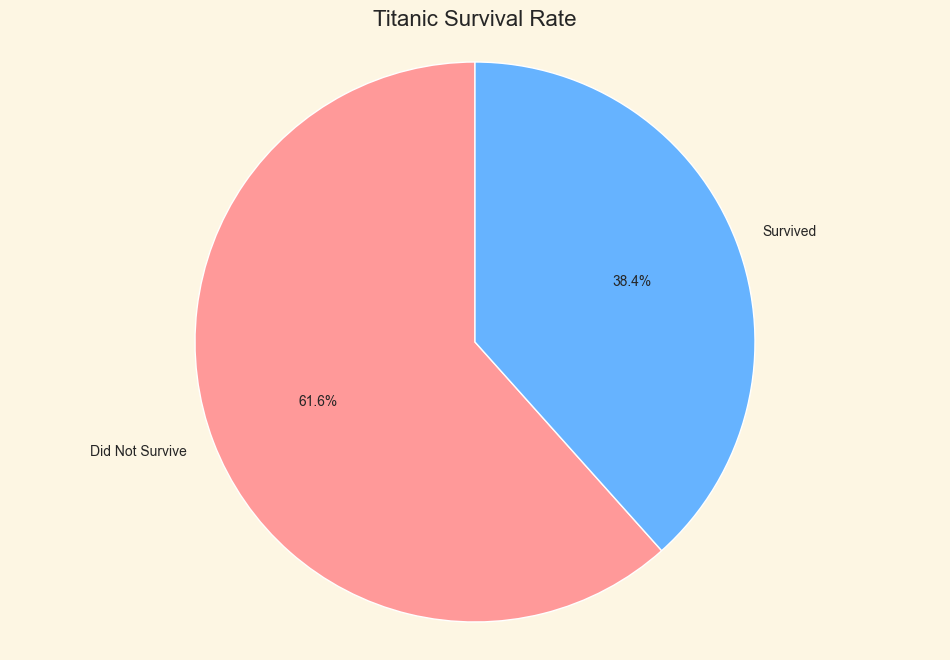

Survival rate: 38.38%


In [ ]:
 #Create a pie chart of survival counts
# autopct adds percentage labels, startangle rotates the chart
survival_counts = train_processed['Survived'].value_counts()
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

plt.title('Titanic Survival Rate', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

print(f"Survival rate: {survival_counts[1] / sum(survival_counts):.2%}")

In [ ]:
# ### 6.2 Survival by Passenger Class

# In[24]:


# Visualize survival rate by passenger class
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

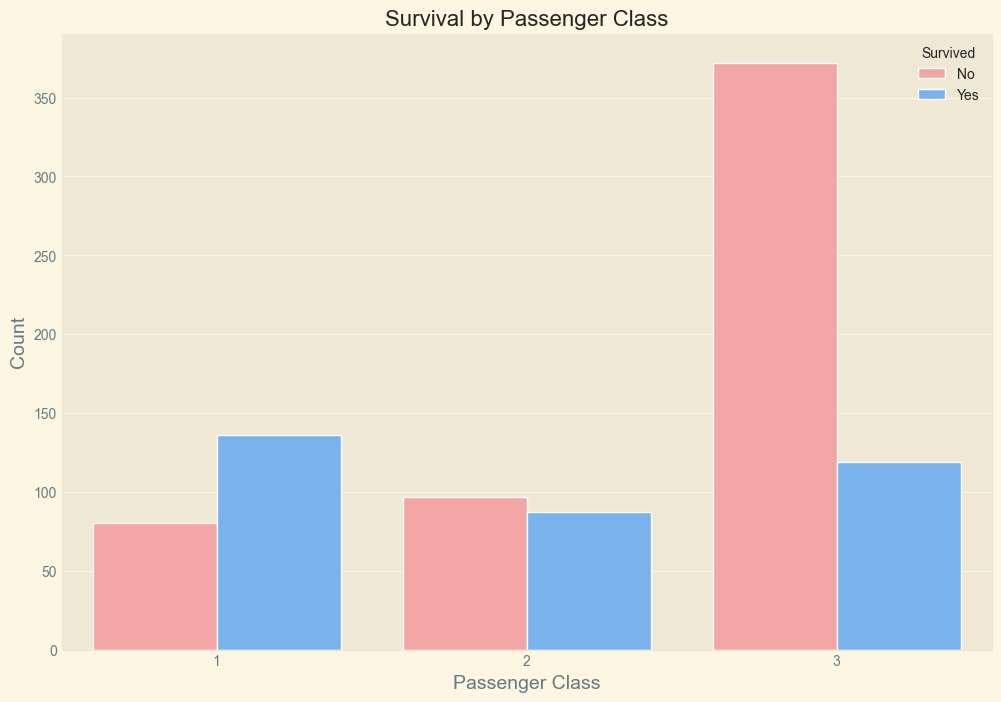

In [ ]:
# Create a grouped bar chart for survival by class
# countplot automatically counts occurrences of categories
sns.countplot(x='Pclass', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'])

plt.title('Survival by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])


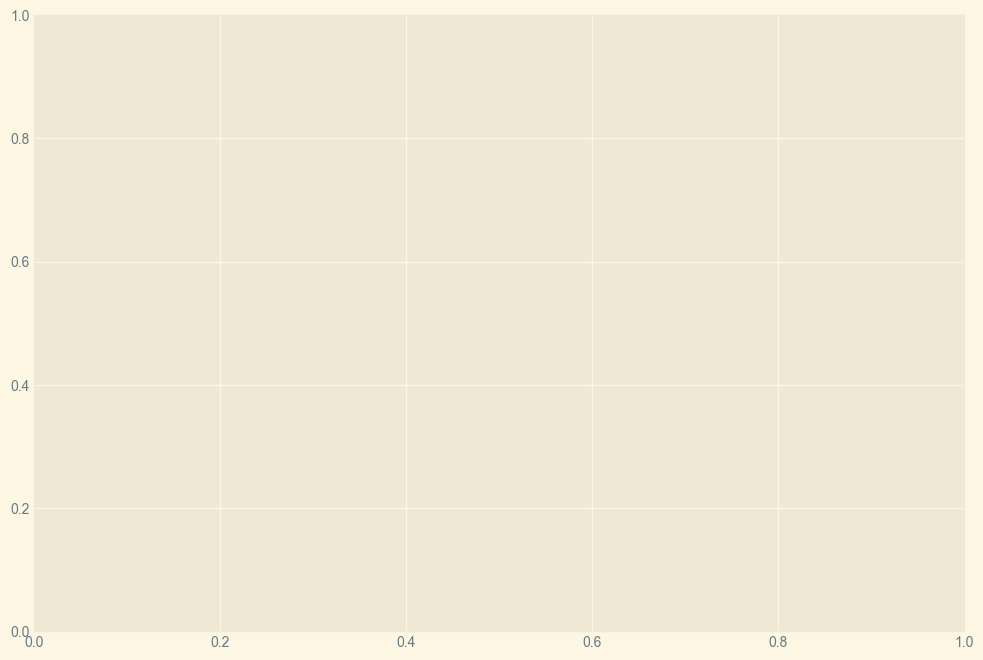

In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.show()

In [ ]:

# Calculate and display survival rates by class
class_survival = train_processed.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by passenger class:")
for pclass, rate in class_survival.items():
    print(f"Class {pclass}: {rate:.2%}")

Survival rate by passenger class:
Class 1: 62.96%
Class 2: 47.28%
Class 3: 24.24%


In [ ]:

# ### 6.3 Survival by Gender

# In[25]:


# Visualize survival rate by gender
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

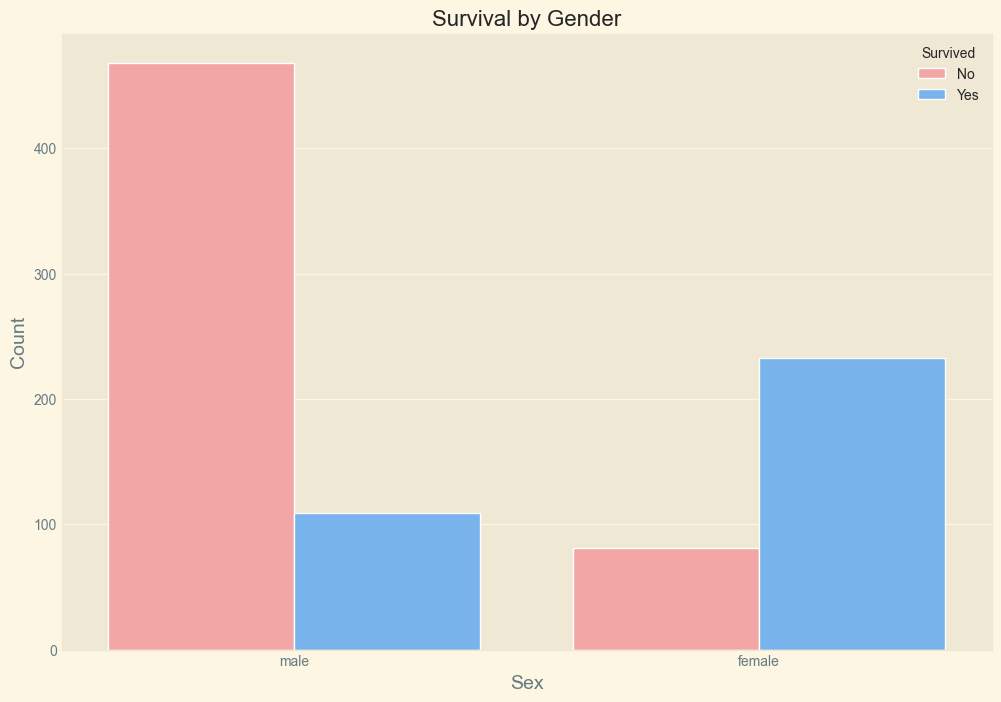

In [ ]:
# Create a grouped bar chart for survival by gender
sns.countplot(x='Sex', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'])

plt.title('Survival by Gender', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])

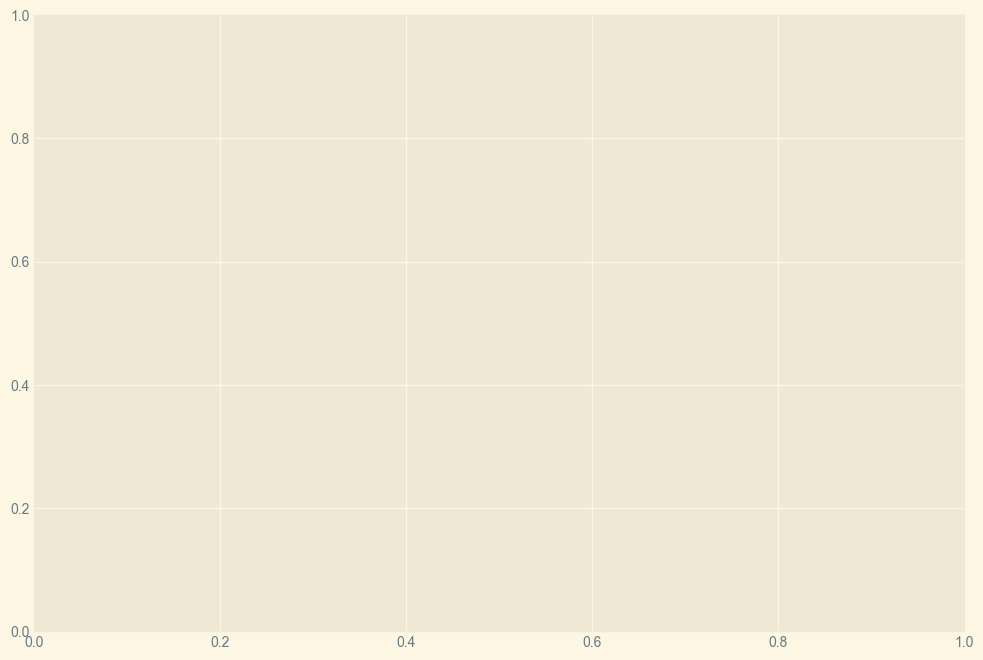

In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.show()


In [ ]:
# Calculate and display survival rates by gender
gender_survival = train_processed.groupby('Sex')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by gender:")
for gender, rate in gender_survival.items():
    print(f"{gender}: {rate:.2%}")

Survival rate by gender:
female: 74.20%
male: 18.89%


In [ ]:
# ### 6.4 Survival by Age

# In[26]:


# Visualize survival by age distribution
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

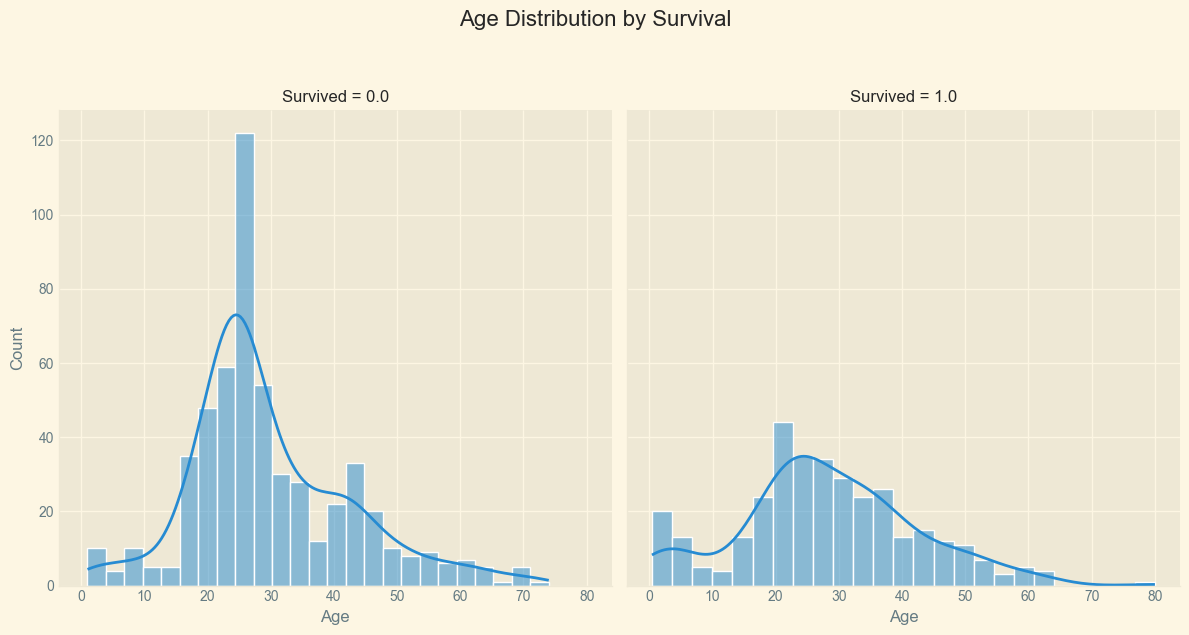

In [ ]:
# Create a FacetGrid to separate survived vs not survived
# This makes two separate plots based on the 'Survived' value
g = sns.FacetGrid(train_processed, col='Survived', height=6)
g.map(sns.histplot, 'Age', kde=True, bins=25)  # Plot age distribution for each category

plt.suptitle('Age Distribution by Survival', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

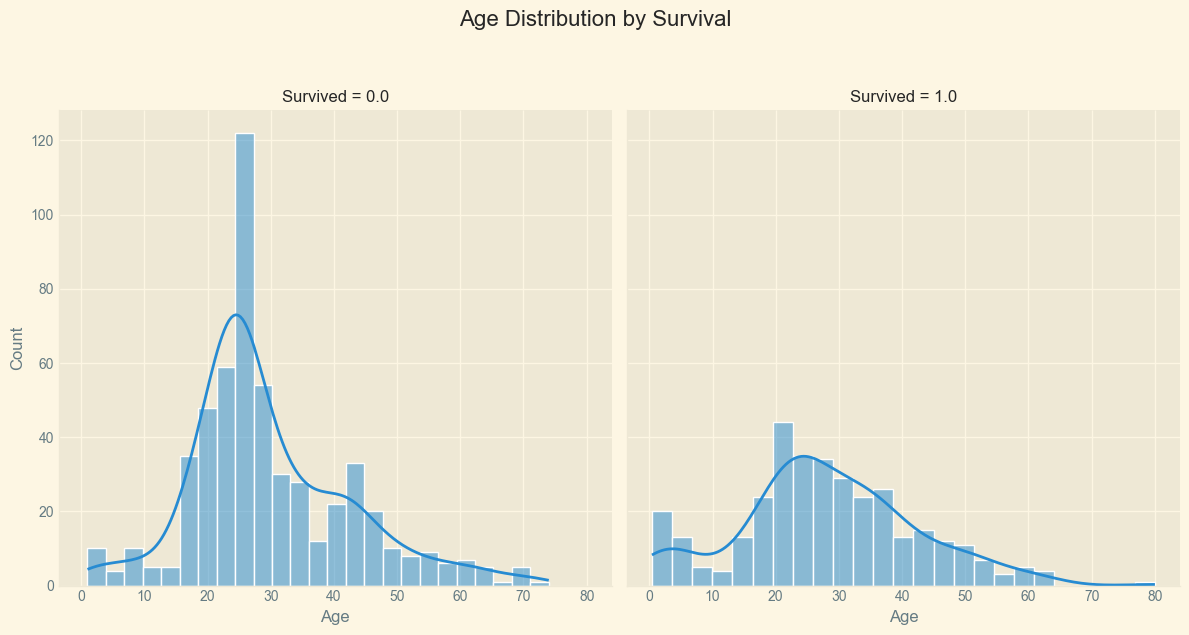

In [ ]:
# Create a FacetGrid to separate survived vs not survived
# This makes two separate plots based on the 'Survived' value
g = sns.FacetGrid(train_processed, col='Survived', height=6)
g.map(sns.histplot, 'Age', kde=True, bins=25)  # Plot age distribution for each category

plt.suptitle('Age Distribution by Survival', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
 #In[27]:


# Visualize survival rate by age group
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create a grouped bar chart for survival by age group
sns.countplot(x='AgeGroup', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'], order=age_labels)

plt.title('Survival by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])


ValueError: Could not interpret value `AgeGroup` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.show()


In [ ]:
# Calculate and display survival rates by age group
age_survival = train_processed.groupby('AgeGroup')['Survived'].mean().reindex(age_labels)
print("Survival rate by age group:")
for age_group, rate in age_survival.items():
    print(f"{age_group}: {rate:.2%}")


In [ ]:

# ### 6.5 Survival by Family Size

# In[28]:


# Visualize survival rate by family size
plt.figure(figsize=(12, 6))

In [ ]:
# Create a grouped bar chart for survival by family size
sns.countplot(x='FamilySize', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'])

plt.title('Survival by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])

In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.show()

In [ ]:
# Calculate and display survival rates by family size
family_survival = train_processed.groupby('FamilySize')['Survived'].mean()
print("Survival rate by family size:")
for family_size, rate in family_survival.items():
    print(f"Size {family_size}: {rate:.2%}")

In [ ]:

# ### 6.6 Survival by Fare

# In[29]:


# Visualize survival by fare distribution using box plots
plt.figure(figsize=(10, 6))

In [ ]:
# Create boxplots showing fare distribution by survival status
sns.boxplot(x='Survived', y='Fare', data=train_processed, 
            palette=['#ff9999','#66b3ff'])

plt.title('Fare Distribution by Survival', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [ ]:
# In[30]:

In [ ]:
# Visualize survival rate by fare range
plt.figure(figsize=(10, 6))


In [ ]:
# Create a grouped bar chart for survival by fare range
sns.countplot(x='FareRange', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'], order=fare_labels)

plt.title('Survival by Fare Range', fontsize=16)
plt.xlabel('Fare Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])

In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.show()


In [ ]:
# Calculate and display survival rates by fare range
fare_survival = train_processed.groupby('FareRange')['Survived'].mean().reindex(fare_labels)
print("Survival rate by fare range:")
for fare_range, rate in fare_survival.items():
    print(f"{fare_range}: {rate:.2%}")

In [ ]:
# ### 6.7 Survival by Embarked Port

# In[31]:

In [ ]:
# Visualize survival rate by embarked port
plt.figure(figsize=(10, 6))

In [ ]:
# Create a grouped bar chart for survival by embarked port
sns.countplot(x='Embarked', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'])

plt.title('Survival by Embarked Port', fontsize=16)
plt.xlabel('Embarked Port', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])


In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.show()


In [ ]:
# Calculate and display survival rates by embarked port
port_survival = train_processed.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by embarked port:")
for port, rate in port_survival.items():
    print(f"Port {port}: {rate:.2%}")

In [ ]:
# ### 6.8 Survival by Title

# In[32]:


# Visualize survival rate by passenger title
plt.figure(figsize=(12, 6))

In [ ]:

# Create a grouped bar chart for survival by title
sns.countplot(x='Title', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'])

plt.title('Survival by Passenger Title', fontsize=16)
plt.xlabel('Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])

In [ ]:

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate and display survival rates by title
title_survival = train_processed.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by passenger title:")
for title, rate in title_survival.items():
    print(f"{title}: {rate:.2%}")

In [ ]:
# ### 6.9 Survival by Deck

# In[33]:


# Visualize survival rate by deck
plt.figure(figsize=(12, 6))

In [ ]:
# Create a grouped bar chart for survival by deck
sns.countplot(x='Deck', hue='Survived', data=train_processed, 
              palette=['#ff9999','#66b3ff'])

plt.title('Survival by Deck', fontsize=16)
plt.xlabel('Deck', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])

In [ ]:
# Add count labels on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only add labels for bars with height > 0
        plt.gca().annotate(f'{height}', 
                           (p.get_x() + p.get_width() / 2., height),
                           ha = 'center', va = 'bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate and display survival rates by deck
# Filter out decks with very few passengers to avoid misleading rates
deck_counts = train_processed['Deck'].value_counts()
valid_decks = deck_counts[deck_counts > 5].index.tolist()

deck_survival = train_processed[train_processed['Deck'].isin(valid_decks)].groupby('Deck')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by deck (for decks with >5 passengers):")
for deck, rate in deck_survival.items():
    print(f"Deck {deck}: {rate:.2%}")

In [ ]:

# ### 6.10 Interactive Multi-feature Analysis with Plotly

# In[34]:


# Create interactive visualizations using Plotly
# This bubble chart shows survival by class, sex, and age
# with bubble size representing fare

In [ ]:

# Create an interactive bubble chart
fig = px.scatter(train_processed, 
                x='Age', 
                y='Fare', 
                size='FamilySize',
                color='Survived', 
                facet_col='Sex',
                facet_row='Pclass',
                hover_name='Name',
                hover_data=['Ticket', 'Cabin', 'Embarked'],
                color_discrete_sequence=['#ff6b6b', '#4ecdc4'],
                title='Survival by Class, Sex, Age, Fare, and Family Size',
                labels={'Survived': 'Survived', 'Age': 'Age', 'Fare': 'Fare'},
                category_orders={'Survived': [0, 1], 'Pclass': [1, 2, 3]},
                height=800)

In [ ]:

# Update the layout for better readability
fig.update_layout(
    font=dict(size=12),
    legend=dict(title='Survived', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

In [ ]:
# Show the interactive figure
fig.show()

In [ ]:
# ## 7. Correlation Analysis
# 
# Let's examine the correlations between features and survival:

# In[35]:


# Calculate correlations with survival for numerical features
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                    'FamilySize', 'IsAlone', 'HasCabin']
correlations = train_processed[numeric_features].corr()['Survived'].sort_values(ascending=False)

In [ ]:
# Display correlations with survival
print("Correlations with Survival (numerical features):")
print(correlations)

In [ ]:
# Create a bar chart of correlations
plt.figure(figsize=(12, 8))
correlations.drop('Survived').plot(kind='bar', color=np.where(correlations.drop('Survived') > 0, '#4ecdc4', '#ff6b6b'))
plt.title('Correlation of Features with Survival', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.3)

In [ ]:
 #Add correlation values above/below each bar
for i, corr in enumerate(correlations.drop('Survived')):
    plt.annotate(f'{corr:.2f}', 
                 (i, corr + (0.01 if corr >= 0 else -0.03)),
                 ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# In[36]:


# Create a correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = train_processed[numeric_features].corr()


In [ ]:

# Generate a mask for the upper triangle of the correlation matrix
# This makes the heatmap show only the lower triangle for cleaner display
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

In [ ]:

# Create the heatmap with seaborn
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': .8})

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# ## 8. Multivariate Analysis
# 
# Let's examine how multiple features interact to affect survival:

# In[37]:


# Create a visualization of survival by passenger class and sex
plt.figure(figsize=(12, 6))

In [ ]:
# Use FacetGrid to create separate plots for each passenger class
g = sns.FacetGrid(train_processed, col='Pclass', height=5)
g.map(sns.countplot, 'Sex', 'Survived', palette=['#ff9999','#66b3ff'])

plt.suptitle('Survival by Class and Sex', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate survival rates by class and sex
class_sex_survival = train_processed.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("Survival rate by class and sex:")
print(class_sex_survival)

In [ ]:

# In[38]:


# Create a visualization of survival by passenger class and age group
plt.figure(figsize=(16, 8))

In [ ]:
# Create a subplot grid
plt.subplot(1, 2, 1)


In [ ]:
# Plot survival by class and age group for males
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', 
            data=train_processed[train_processed['Sex'] == 'male'],
            palette='Blues', order=age_labels)
plt.title('Male Survival by Age Group and Class', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(title='Class')

plt.subplot(1, 2, 2)

In [ ]:
# Plot survival by class and age group for females
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', 
            data=train_processed[train_processed['Sex'] == 'female'],
            palette='Reds', order=age_labels)
plt.title('Female Survival by Age Group and Class', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(title='Class')

plt.suptitle('Survival Rate by Sex, Age Group, and Class', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# In[39]:


# Create a visualization of survival by family situation
# Using both IsAlone and Pclass

# First, create a figure
plt.figure(figsize=(12, 6))


In [ ]:
# Create a grouped bar chart
sns.catplot(x='IsAlone', y='Survived', hue='Pclass', col='Sex',
            data=train_processed, kind='bar', height=5, aspect=0.8,
            palette=['#3498db', '#2ecc71', '#e74c3c'])

plt.suptitle('Survival Rate by Traveling Alone Status, Class, and Sex', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate survival rates
alone_class_sex_survival = train_processed.groupby(['IsAlone', 'Pclass', 'Sex'])['Survived'].mean().reset_index()
print("Survival rate by traveling alone status, class, and sex:")
print(alone_class_sex_survival.sort_values('Survived', ascending=False))

In [ ]:
# ## 9. Summary of Insights

# In[40]:


# Create a summary of key insights found during EDA

# Create a plotly table for insights
insights = [
    ['Gender', 'Women had a much higher survival rate (74%) than men (19%).'],
    ['Class', 'First-class passengers had the highest survival rate (63%), followed by second-class (47%) and third-class (24%).'],
    ['Age', 'Children under 12 had a higher survival rate (50%) compared to adults.'],
    ['Family', 'Passengers traveling with 1-3 family members had higher survival rates than those traveling alone or with very large families.'],
    ['Fare', 'Higher fare paying passengers were more likely to survive.'],
    ['Embarked', 'Passengers who embarked from Cherbourg (C) had higher survival rates (55%) than those from Queenstown (Q) or Southampton (S).'],
    ['Cabin', 'Passengers with known cabin information were more likely to survive (30% vs 60%).'],
    ['Titles', "Passengers with 'Master' or 'Mrs' titles had higher survival rates."],
    ['Combined', 'Class and gender had the strongest combined effect on survival: first-class women had a 97% survival rate while third-class men had only a 14% survival rate.']
]


In [ ]:
# Create a plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Factor', 'Key Insight'],
                fill_color='#4F628E',
                font=dict(color='white', size=14),
                align='left',
                height=40),
    cells=dict(values=list(zip(*insights)),
               fill_color=['#F0F2F6', '#EAEDED'],
               font=dict(color='black', size=12),
               align='left',
               height=30))
])

fig.update_layout(
    title="Key Insights from Titanic EDA",
    height=500,
    margin=dict(l=10, r=10, t=40, b=10)
)

fig.show()

In [ ]:
# ## 10. Conclusion

# Based on our extensive exploratory data analysis, we can draw several important conclusions about the factors that influenced survival on the Titanic:
# 
# 1. **Gender was the strongest single predictor of survival**. Women were much more likely to survive than men, reflecting the "women and children first" evacuation policy.
# 
# 2. **Social class played a significant role**. First-class passengers had much higher survival rates than second-class, who in turn fared better than third-class passengers. This suggests that passenger class influenced access to lifeboats.
# 
# 3. **Age was also important**. Children had higher survival rates, particularly in second and third class.
# 
# 4. **Family relationships mattered**. Passengers traveling with small families (1-3 additional family members) had better survival chances than either solo travelers or those with very large families.
# 
# 5. **Cabin location appears significant**. Passengers with cabin information recorded (likely indicating higher-status cabins on upper decks) had better survival rates.
# 
# 6. **Embarkation port correlated with survival**. This might reflect socioeconomic differences between passengers boarding at different ports.
# 
# 7. **The combination of gender and class was extremely predictive**. First-class women had nearly universal survival, while third-class men had very low survival rates.
# 
# These insights provide valuable understanding of the social and physical factors that influenced who survived this historic disaster. They also provide a strong foundation for building predictive models to determine the factors that most affected a passenger's chance of survival.

# In[ ]: